# Assignment 2 - Darren Wen (28328748)

This assignment predicts the survival of passengers on the titanic. The dataset comes from the stanford website (https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html). The dataset contains the following features that correlate with the output: 
<br>
- passenger class
<br>
- sex
<br>
- age
<br>
- number of siblings/spouses aboard
<br>
- number of parents/children aboard
<br>
- fare

### Import libraries


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sb

### Import data


In [49]:
dataset = pd.read_csv("titanic.csv")

In [50]:
pd.DataFrame(dataset)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### Data preprocessing

In [52]:
dataset.drop('Name', inplace=True, axis=1)
sex = {"male":0, "female":1}
dataset['Sex'] = dataset['Sex'].map(sex)
pd.DataFrame(dataset)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,0,27.0,0,0,13.0000
883,1,1,1,19.0,0,0,30.0000
884,0,3,1,7.0,1,2,23.4500
885,1,1,0,26.0,0,0,30.0000


In [53]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [54]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,3.0,0.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,1.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,3.0,0.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
882,2.0,0.0,27.0,0.0,0.0,13.0000
883,1.0,1.0,19.0,0.0,0.0,30.0000
884,3.0,1.0,7.0,1.0,2.0,23.4500
885,1.0,0.0,26.0,0.0,0.0,30.0000


In [55]:
pd.DataFrame(y)

,0
0,0
1,1
2,1
3,1
4,0
...,...
882,0
883,1
884,0
885,1


### Exploring the data 

In [80]:
dataset.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,0.391405,2.322880,0.360046,28.371278,0.537747,0.387921,32.156121
std,0.488348,0.828447,0.480293,12.785439,1.117526,0.807259,49.759460
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,60.000000,8.000000,6.000000,512.329200


#### Removing outliers

<AxesSubplot:xlabel='Survived', ylabel='Age'>

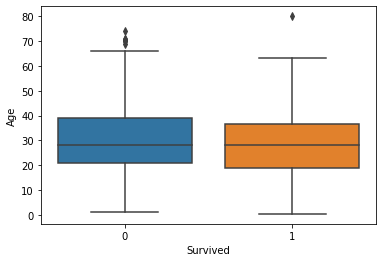

In [56]:
sb.boxplot(x='Survived', y='Age', data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

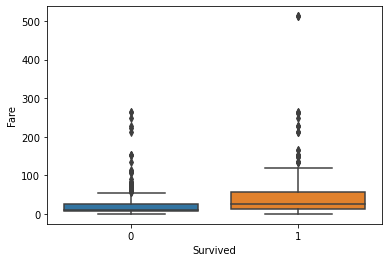

In [57]:
sb.boxplot(x='Survived', y='Fare', data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

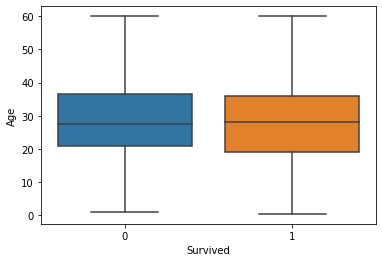

In [58]:
dataset = dataset[((dataset['Age']<61) & (dataset['Survived']==0)) | ((dataset['Age']<62)&(dataset['Survived']==1))]
sb.boxplot(x='Survived', y='Age', data=dataset)

Since there are so many outliers for the fare/survived boxplot, we won't remove them since it may heavily affect our dataset (may take away too much of the data). That is why only the outliers for age/survived were removed. 

#### Correlation Matrix

Survived                   1.000000
Sex                        0.538707
Fare                       0.263498
Parents/Children Aboard    0.083386
Age                       -0.032675
Siblings/Spouses Aboard   -0.043083
Pclass                    -0.355848
Name: Survived, dtype: float64

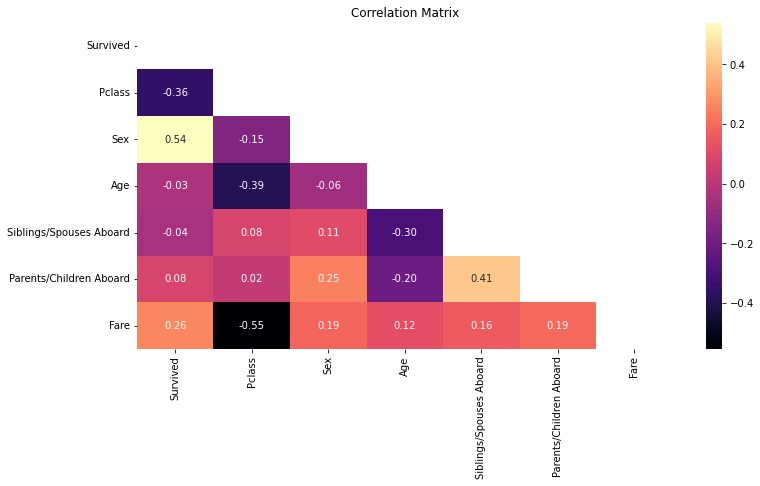

In [59]:
# creating the correlation matrix

corr_matrix = dataset.corr()

# visualizing the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  
plt.figure(figsize=(12, 6))  # to set the figure size
heatmap(corr_matrix, mask=mask, annot=True, lw=0, linecolor='white', cmap='magma', fmt='0.2f')
plt.title("Correlation Matrix")  # to add title 
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# getting the correlation values with the survived column
corr_matrix['Survived'].sort_values(ascending=False)  

Sex and fare have positive correlation with survival, meaning that being a female and having a higher fare meant more likely chance of survival. Passenger class had a negative correlation with survival. Age, parents/children aboard, spouses/siblings aboard had minimal correlation with survival as the values were close to 0. 

### Scale and then split the data to test/train set

In [60]:
from sklearn.preprocessing import StandardScaler
my_sc = StandardScaler()
X= my_sc.fit_transform(X)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
X_test.shape

(178, 6)

In [63]:
X_train.shape

(709, 6)

#### Import ML models

In [64]:
from sklearn.model_selection import cross_val_score
# importing the models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Naive Bayes

In [78]:
avg_cv_scores = {}
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
scores = cross_val_score(nb_clf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['NB'] = np.average(scores)

[0.82394366 0.85915493 0.73943662 0.75352113 0.81560284]
Averaged prediction accuracy =  0.7983318349815203


#### KNN

In [79]:
knn_clf = KNeighborsClassifier(n_neighbors=5) # change n_neighbors; boundary becomes smoother with increasing value of K
knn_clf.fit(X_train, y_train)
scores = cross_val_score(knn_clf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['KNN'] = np.average(scores)

[0.8028169  0.84507042 0.78873239 0.79577465 0.81560284]
Averaged prediction accuracy =  0.8095994406153231


#### SVM-Linear

In [81]:
svmln_clf = SVC(kernel='linear')
svmln_clf.fit(X_train, y_train)
scores = cross_val_score(svmln_clf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-linear'] = np.average(scores)

[0.8028169  0.85915493 0.74647887 0.75352113 0.80851064]
Averaged prediction accuracy =  0.7940964938567576


#### SVM- non linear (rbf)

In [68]:
svmrbf_clf = SVC(kernel='rbf')
svmrbf_clf.fit(X_train, y_train)
scores = cross_val_score(svmrbf_clf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-nonlinear RBF'] = np.average(scores)

[0.83802817 0.88732394 0.79577465 0.83098592 0.85106383]
Averaged prediction accuracy =  0.8406353011687144


#### Decision Tree


In [82]:
tree_clf = DecisionTreeClassifier(max_depth=3) # Play with hyperparameter
tree_clf.fit(X_train, y_train)
scores = cross_val_score(tree_clf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Decision Tree'] = np.average(scores)

[0.82394366 0.88732394 0.78169014 0.8028169  0.85106383]
Averaged prediction accuracy =  0.8293676955349116


#### Random Forest 

In [70]:
rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_clf.fit(X_train, y_train)
scores = cross_val_score(rf_clf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['Random Forest'] = np.average(scores)

[0.8028169  0.79577465 0.76760563 0.78169014 0.81560284]
Averaged prediction accuracy =  0.7926980321646189


#### SVM non-linear (Poly)

In [71]:
svmpoly_clf = SVC(kernel='poly')
svmpoly_clf.fit(X_train, y_train)
scores = cross_val_score(svmpoly_clf, X_train, y_train, scoring='accuracy', cv=5)
print(scores)
print('Averaged prediction accuracy = ', np.average(scores))
avg_cv_scores['SVM-nonlinear Poly'] = np.average(scores)

[0.82394366 0.85915493 0.77464789 0.81690141 0.83687943]
Averaged prediction accuracy =  0.8223054639896115


#### Sort the scores in order of highest

In [72]:
sorted_scores = sorted(avg_cv_scores.items(), key=lambda X:X[1], reverse=True)
sorted_scores

[('SVM-nonlinear RBF', 0.8406353011687144),
 ('Decision Tree', 0.8293676955349116),
 ('SVM-nonlinear Poly', 0.8223054639896115),
 ('KNN', 0.8095994406153231),
 ('NB', 0.7983318349815203),
 ('SVM-linear', 0.7940964938567576),
 ('Random Forest', 0.7926980321646189)]

The models were evaluated using 5 fold cross validation scores.The non-linear SVM RBF model had the best score with 0.84. The next best were the decision tree and SVM non-linear poly models with 0.83 and 0.82 each. The lowest scoring model was the random forest model. 
Since the nonlinear svm rbf model had the best accuracy score, we will further evaluate it using a confusion matrix and comparing it against test data. 

#### Confusion Matrix


Accuracy of SVM-nonlinear rbf: 0.797752808988764


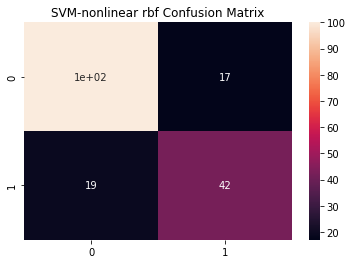

In [77]:
test_pred_score = {}

#Non-linear SVM rbf
y_test_pred_svmrbf = svmrbf_clf.predict(X_test)
test_pred_score['SVM_nonlinear rbf'] = accuracy_score(y_test, y_test_pred_svmrbf)

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_test_pred_svmrbf)
sb.heatmap(cf_matrix, annot=True).set(title='SVM-nonlinear rbf Confusion Matrix')
plt.show
print("Accuracy of SVM-nonlinear rbf:", accuracy_score(y_test, y_test_pred_svmrbf))

From the results, the model performed at an approx 80% accuracy. 

The top left corner (100) is the number of correctly predicted survival

The top right corner (17) is the number of times a passenger was predicted to survive but did not

The bottom left corner (19) is the number of times a passenger was predicted to die but actually survived

The bottom right corner (42) is the number of correctly predicted passengers deaths

#### Conclusion


The nonlinear SVM rbf model had an 80% accuracy when predicting the survival of a passenger on the titanic, based on various factors. The confusion matrix showed that the model predicted incorrectly 36 times and predicted correcty 142 times. 